# LIF Neuron (baseline model)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. simulation parameter
T = 200
dt = 0.1
time = np.arange(0,T,dt)

In [3]:
# 2.LIF model parameter
tau_m = 20 #membrane time constant(ms)
v_rest = -65 # resting potential
v_reset = -65
v_th = -50 # firning potential 

v = v_th

In [5]:
# 3.input current 
I = np.zeros(len(time))
I[500:1500] =10

In [6]:
# 4. staorage
v_trace = []
spike_times = []

In [7]:
# 5. LIF Simulation loop
for i,t in enumerate (time):
    dv= (-(v-v_rest)+ I[i])/tau_m
    v += dv*dt

    if v>= v_th:
        v_trace.append(30)
        spike_times.append(t)
        v = v_reset
    else:
        v_trace.append(v)

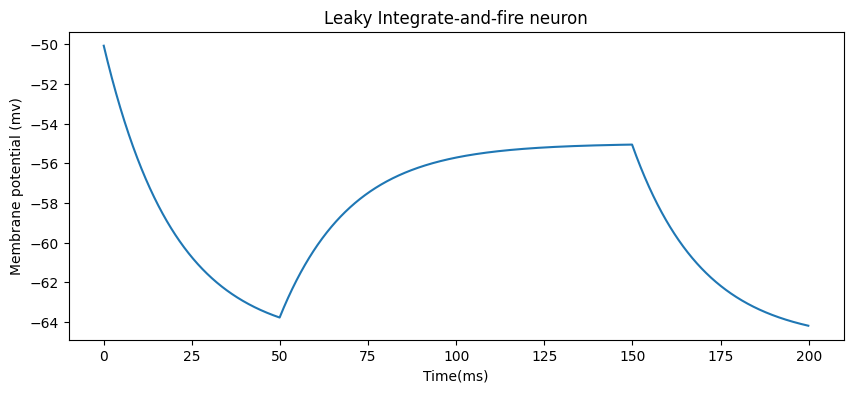

In [8]:
# 6.Plot membrane potential 
plt.figure(figsize=(10,4))
plt.plot(time, v_trace)
plt.xlabel("Time(ms)")
plt.ylabel("Membrane potential (mv)")
plt.title("Leaky Integrate-and-fire neuron")
plt.show()

### observation:
The LIF model produces regular spiking behavior of the neuron but lack the ability to reproduce diverse cortical firing patterns such as burtsting or adaptation. This highlights its limited biological realism ,as discussed by the Izhikevich(2004).

# Izhikevich Neuron Model

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
# 1.simulation parameter
T = 200
dt = 0.5  #here we will notice that for the LIF model the dt was 0.1 but now its 0.5 so this will change the parameter and the plot along with that.
time = np.arange(0,T,dt)

In [11]:
# 2.Izhikevich parameters(Regular spiking neuron)
a = 0.02
b = 0.2
c = -65
d = 8

v = -65
u = b*v

In [12]:
# 3.Input current
I = np.zeros(len(time))
I[100:300] = 10

In [13]:
# 4.Storage
v_trace = []
spike_times = []

In [14]:
# 5.Simulation loop
for i,t in enumerate(time):
    if v>= 30:
        v_trace.append(30)
        spike_times.append(t)
        v = c
        u += d
    else:
        v_trace.append(v)
        dv = (0.04*v*v + 5*v  + 140 - u + I[i])*dt
        du = (a*(b*v - u))*dt
        v += dv
        u += du

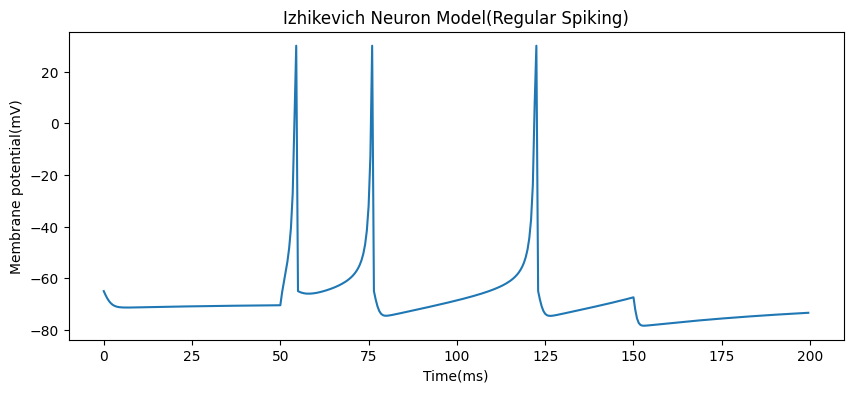

In [15]:
# 6.Plot membrane potential
plt.figure(figsize=(10,4))
plt.plot(time, v_trace)
plt.xlabel("Time(ms)")
plt.ylabel("Membrane potential(mV)")
plt.title("Izhikevich Neuron Model(Regular Spiking)")
plt.show()

### Observation:
The Izhikevich neuron model reproduces biologically realistic spiking behavior while remaining computationally efficient. Compared to the LIF model, it captures adaptation and richer dynamics using only two coupled equations , supporting the trade-off discussed in Izhikevich(2004).

# Hodgkin -Huxley Neuron Model

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 1.Simulation parameters
T = 200 # ms
dt = 0.01 #small timestep(important)
time = np.arange(0,T,dt)

In [18]:
# 2.Hodgkin-Huxley parameter
c_m = 1.0   # membrane capacitance

g_Na = 120.0
g_K = 36.0
g_l = 0.3

E_Na = 50
E_K = -77
E_L = -54.4

In [19]:
# 3.Input conditions
V = -65
m = 0.05
h = 0.6
n = 0.32

In [20]:
# 4.Input current
I = np.zeros(len(time))
I[int(50/dt):int(150/dt)] = 10

In [21]:
# 5.Gating variable functions
def alpha_m(V):
    return (0.1*(V+40))/(1-np.exp(-(V+40)/10))

def beta_m(V):
    return 4*np.exp(-(V+65)/18)


def alpha_h(V):
    return 0.07*np.exp(-(V+65)/20)
def beta_h(V):
    return 1/(1+ np.exp(-(V+35)/10))


def alpha_n(V):
    return (0.01*(V+55))/(1-np.exp(-(V+55)/10))
def beta_n(V):
    return 0.125*np.exp(-(V+65)/80)

In [24]:
# 6. simulation loop
V_trace = []

for i in range(len(time)):
    #Ionic currents
    I_Na = g_Na * (m**3) * h *(V - E_Na)
    I_K = g_K * (n**4) * (V - E_K)
    I_L = g_l *(V - E_L)

    dV = (I[i] - I_Na - I_K - I_L)/ c_m
    V += dV * dt

    m += (alpha_m(V)*(1-m) - beta_m(V)*m) *dt
    h += (alpha_h(V)*(1-h) - beta_h(V)*h) *dt
    n += (alpha_n(V)*(1-n) - beta_n(V)*n) *dt

    V_trace.append(V)

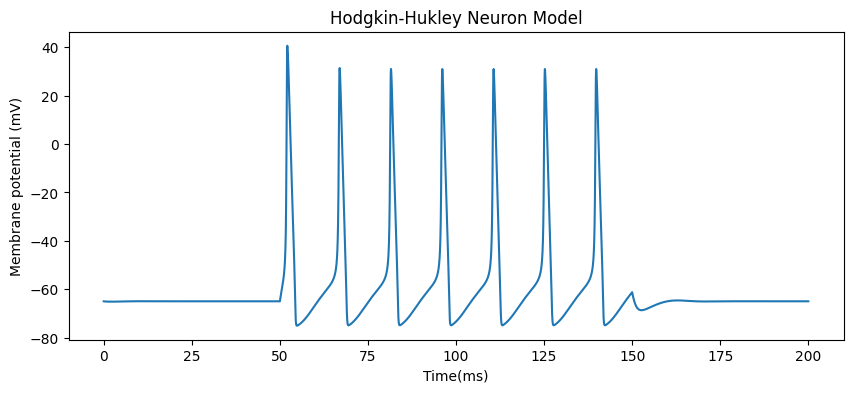

In [25]:
# 7.Plot membrane potential
plt.figure(figsize= (10,4))
plt.plot(time , V_trace)
plt.xlabel("Time(ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Hodgkin-Hukley Neuron Model")
plt.show()

### Observation:
The Hodgkin-Huxley model reproduces highly realistic action potential dynamics by explicitly modeling ionic currents and gating variables.However, this biological accuracy comes at a significant computational cost, supporting the trade-off between realism and efficiency discussed by the Izhikevich(2004).